In [3]:
from dotenv import load_dotenv
load_dotenv()

from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from typing import Annotated

In [4]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [ ]:
class State(TypedDict):
    message:Annotated[list,add_messages]

def chatbot(state:State) ->State:
    return {"message":[llm.invoke(state["message"])]}

builder = StateGraph(State)

builder.add_node('Chatbot_Node',chatbot)

builder.add_edge(START,"Chatbot_Node")
builder.add_edge("Chatbot_Node",END)

graph = builder.compile()


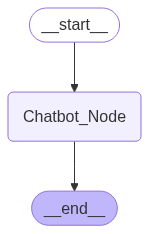

In [19]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
message = {"role":"user","content":"Hello,i am vishal"}
responce = graph.invoke({"message":[message]})

responce["message"]

[HumanMessage(content='Hello,i am vishal', additional_kwargs={}, response_metadata={}, id='8223571e-9419-456b-894b-866996a3cde2'),
 AIMessage(content="Hello Vishal, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--432891ab-3b61-4173-b6d9-61a00af99cc5-0', usage_metadata={'input_tokens': 7, 'output_tokens': 20, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}})]

In [16]:
state = None
while True:
    in_message = input("you")
    if in_message.lower() in ["quit", "exit", "bye", "goodbye", "see you later"]:
        print("Gemini: Goodbye! 👋")
        break
    if state is None:
        state:State = {
            "message":[{"role":"user","content":in_message}]
        }
    else:
        state["message"].append({"role":"user","content":in_message})

    state = graph.invoke(state)
    print("Gemini:",state["message"][-1].content)


Gemini: Okay, let's create a roadmap for building your own AI Assistant model using LangGraph. This roadmap will cover the key steps, considerations, and potential challenges involved.

**Overall Goal:** Build a LangGraph-powered AI Assistant capable of handling user requests, leveraging various tools (like search, calculators, databases, etc.), and providing helpful, context-aware responses.

**Roadmap:**

**Phase 1: Foundational Setup and Core Functionality**

1.  **Environment Setup & Dependencies:**
    *   **Python Environment:**  Use a virtual environment (e.g., `venv`, `conda`) to manage dependencies.
    *   **Install LangChain and LangGraph:**
        ```bash
        pip install langchain langchain-core langchain-community langgraph
        # Install necessary tools and dependencies as needed (e.g., google-search-results, wikipedia)
        ```
    *   **API Keys:**  Obtain API keys for any external services you plan to use (e.g., OpenAI, Google Search, etc.). Store these secu